# Candlestick Animation with Plotly:

## About this code

 - I googled "Candlestick Animation with Plotly" and I didn't find any code solving the problem then I had to do it by my own. 
 - I developed this code following examples in [plotly documentation](https://plotly.com/python/animations/#using-a-slider-and-buttons)
 - My salary is paid by [Xcapit](https://www.xcapit.com/) :). We develop financial solution on cryptos. Follow [xcapit on twitter](https://twitter.com/xcapitla)
 ![Xcapit, make the ambitous doable](./xcapit.png)
 - Find me on [Linkedin](https://www.linkedin.com/in/matiaslee/)


In [18]:
import plotly.graph_objects as go
import pandas as pd


raw_candles = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
raw_candles = raw_candles[-100:].copy() # more candles, havier the plot
raw_candles.head(1)

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
406,2016-09-26,111.639999,113.389999,111.550003,112.879997,29869400,111.818608,102.184292,109.680667,117.177042,Increasing


In [19]:
new_names = {
    'AAPL.Open': 'open',
    'AAPL.High': 'high',
    'AAPL.Low': 'low',
    'AAPL.Close': 'close',
}
raw_candles.rename(columns=new_names, inplace=True)
raw_candles.set_index('Date', inplace=True)

In [20]:
raw_candles.head(1)

,open,high,low,close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
Date,,,,,,,,,,
2016-09-26,111.639999,113.389999,111.550003,112.879997,29869400,111.818608,102.184292,109.680667,117.177042,Increasing


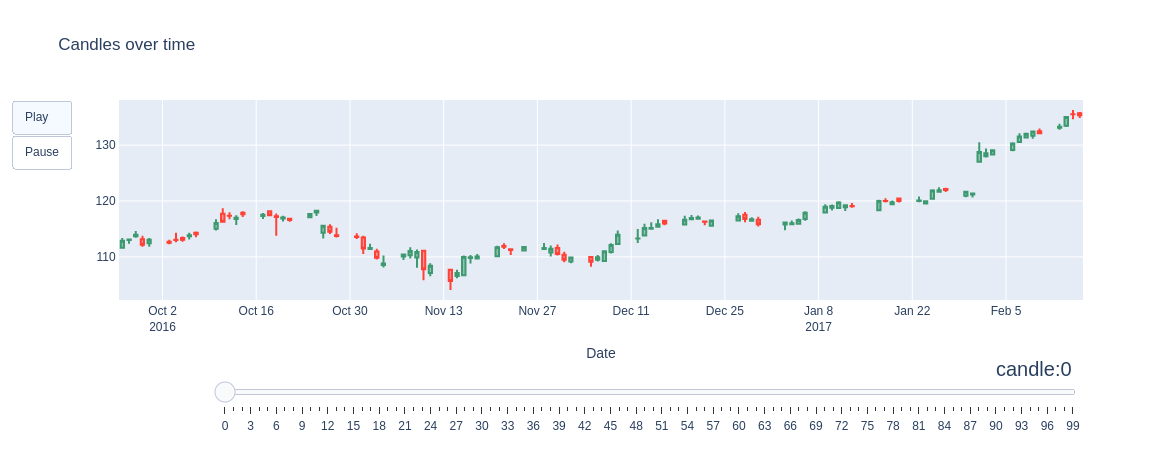

In [21]:
# My Art! we define some variables in order to make the code undertandable

play_button = {
    "args": [
        None, 
        {
            "frame": {"duration": 300, "redraw": True},
            "fromcurrent": True, 
            "transition": {"duration": 100,"easing": "quadratic-in-out"}
        }
    ],
    "label": "Play",
    "method": "animate"
}

pause_button = {
    "args": [
        [None], 
        {
            "frame": {"duration": 0, "redraw": False},
            "mode": "immediate",
            "transition": {"duration": 0}
        }
    ],
    "label": "Pause",
    "method": "animate"
}

sliders_steps = [
    {"args": [
        [0, i], # 0, in order to reset the image, i in order to plot frame i
        {"frame": {"duration": 300, "redraw": True},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
    "label": i,
    "method": "animate"}
    for i in range(len(raw_candles))      
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "candle:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": sliders_steps,
}

initial_plot = go.Candlestick(
    x=raw_candles.index, 
    open=raw_candles.open, 
    high=raw_candles.high, 
    low=raw_candles.low, 
    close=raw_candles.close
)

first_i_candles = lambda i: go.Candlestick(
    x=raw_candles.index, 
    open=raw_candles.open[:i], 
    high=raw_candles.high[:i], 
    low=raw_candles.low[:i], 
    close=raw_candles.close[:i]
)

fig = go.Figure(
    data=[initial_plot],
    layout=go.Layout(
        xaxis=dict(title='Date', rangeslider=dict(visible=False)),
        title="Candles over time",
        updatemenus= [dict(type="buttons", buttons=[play_button, pause_button])],
        sliders = [sliders_dict]
    ),
    frames=[
        go.Frame(data=[first_i_candles(i)], name=f"{i}") # name, I imagine, is used to bind to frame i :) 
        for i in range(len(raw_candles))
    ]
)

fig.show()